In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
import xicorpy as xi
import shap
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [494]:
nelson = pd.read_csv('datasets/regional/Nelson.csv',index_col=False)

In [495]:
nelson.index = nelson.date
nelson.index = pd.to_datetime(nelson.index)
nelson = nelson[['Nelson', 'lagged']]
nelson.head(5)

,Nelson,lagged
date,,
1992-01-31,115000.0,NaN
1992-02-29,108000.0,115000.0
1992-03-31,115000.0,108000.0
1992-04-30,116000.0,115000.0
1992-05-31,115000.0,116000.0


# Other datasets

In [282]:
headers = [
    "Real_GDP_Production-based_$m",
    "Real_GDP_Production-based_$m_s.a.",
    "Real_GDP_Production-based_q/q%_s.a.",
    "Real_GDP_Production-based_y/y%",
    "Nominal_GDP_Expenditure-based_$m",
    "Nominal_GDP_Expenditure-based_$m_s.a.",
    "Nominal_GDP_Expenditure-based_q/q%_s.a.",
    "Nominal_GDP_Expenditure-based_y/y%",
    "Real_GDP_Expenditure-based_$m",
    "Real_GDP_Expenditure-based_$m_s.a.",
    "Real_GDP_Expenditure-based_q/q%_s.a.",
    "Real_GDP_Expenditure-based_y/y%",
    "Nominal_Private_consumption_$m",
    "Nominal_Private_consumption_$m_s.a.",
    "Nominal_Private_consumption_q/q%_s.a.",
    "Nominal_Private_consumption_y/y%",
    "Real_Private_consumption_$m",
    "Real_Private_consumption_$m_s.a.",
    "Real_Private_consumption_q/q%_s.a.",
    "Real_Private_consumption_y/y%",
    "Nominal_Gov_consumption_$m",
    "Nominal_Gov_consumption_$m_s.a.",
    "Nominal_Gov_consumption_q/q%_s.a.",
    "Nominal_Gov_consumption_y/y%",
    "Real_Gov_consumption_$m",
    "Real_Gov_consumption_$m_s.a.",
    "Real_Gov_consumption_q/q%_s.a.",
    "Real_Gov_consumption_y/y%",
    "Nominal_Inventories_change_$m",
    "Nominal_Inventories_change_$m_s.a.",
    "Nominal_Inventories_change_q/q%_s.a.",
    "Nominal_Inventories_change_y/y%",
    "Real_Fixed_capital_residential_$m",
    "Real_Fixed_capital_residential_$m_s.a.",
    "Real_Fixed_capital_residential_q/q%_s.a.",
    "Real_Fixed_capital_residential_y/y%",
    "Nominal_Fixed_capital_residential_$m",
    "Nominal_Fixed_capital_residential_$m_s.a.",
    "Nominal_Fixed_capital_residential_q/q%_s.a.",
    "Nominal_Fixed_capital_residential_y/y%",
    "Real_Fixed_capital_other_$m",
    "Real_Fixed_capital_other_$m_s.a.",
    "Real_Fixed_capital_other_q/q%_s.a.",
    "Real_Fixed_capital_other_y/y%",
    "Nominal_Fixed_capital_other_$m",
    "Nominal_Fixed_capital_other_$m_s.a.",
    "Nominal_Fixed_capital_other_q/q%_s.a.",
    "Nominal_Fixed_capital_other_y/y%",
    "Real_National_expenditure_$m",
    "Real_National_expenditure_$m_s.a.",
    "Real_National_expenditure_q/q%_s.a.",
    "Real_National_expenditure_y/y%",
    "Nominal_National_expenditure_$m",
    "Nominal_National_expenditure_$m_s.a.",
    "Nominal_National_expenditure_q/q%_s.a.",
    "Nominal_National_expenditure_y/y%",
    "Real_Exports_goods_services_$m",
    "Real_Exports_goods_services_$m_s.a.",
    "Real_Exports_goods_services_q/q%_s.a.",
    "Real_Exports_goods_services_y/y%",
    "Nominal_Exports_goods_services_$m",
    "Nominal_Exports_goods_services_$m_s.a.",
    "Nominal_Exports_goods_services_q/q%_s.a.",
    "Nominal_Exports_goods_services_y/y%",
    "Real_Imports_goods_services_$m",
    "Real_Imports_goods_services_$m_s.a.",
    "Real_Imports_goods_services_q/q%_s.a.",
    "Real_Imports_goods_services_y/y%",
    "Nominal_Imports_goods_services_$m",
    "Nominal_Imports_goods_services_$m_s.a.",
    "Nominal_Imports_goods_services_q/q%_s.a.",
    "Nominal_Imports_goods_services_y/y%"
]

In [283]:
gdp = pd.read_excel('datasets/added/gdp.xlsx', skiprows=4)
gdp.index = pd.to_datetime(gdp[gdp.columns[0]])
gdp.index.name = 'date'
gdp.drop(columns=gdp.columns[0], inplace=True)
gdp.columns = headers

In [284]:
gdp.head(5)

,Real_GDP_Production-based_$m,Real_GDP_Production-based_$m_s.a.,Real_GDP_Production-based_q/q%_s.a.,Real_GDP_Production-based_y/y%,Nominal_GDP_Expenditure-based_$m,Nominal_GDP_Expenditure-based_$m_s.a.,Nominal_GDP_Expenditure-based_q/q%_s.a.,Nominal_GDP_Expenditure-based_y/y%,Real_GDP_Expenditure-based_$m,Real_GDP_Expenditure-based_$m_s.a.,...,Nominal_Exports_goods_services_q/q%_s.a.,Nominal_Exports_goods_services_y/y%,Real_Imports_goods_services_$m,Real_Imports_goods_services_$m_s.a.,Real_Imports_goods_services_q/q%_s.a.,Real_Imports_goods_services_y/y%,Nominal_Imports_goods_services_$m,Nominal_Imports_goods_services_$m_s.a.,Nominal_Imports_goods_services_q/q%_s.a.,Nominal_Imports_goods_services_y/y%
date,,,,,,,,,,,,,,,,,,,,,
1987-06-30,27610,27981,NaN,NaN,15519,15788,NaN,NaN,26073,26643,...,NaN,NaN,3980,4038,NaN,NaN,4594,4637,NaN,NaN
1987-09-30,27751,28132,0.5,NaN,15752,16099,2.0,NaN,26431,26712,...,4.3,NaN,4052,3876,-4.0,NaN,4636,4448,-4.1,NaN
1987-12-31,29109,28260,0.5,NaN,16974,16367,1.7,NaN,27738,26780,...,-0.3,NaN,4049,3914,1.0,NaN,4907,4728,6.3,NaN
1988-03-31,28070,28150,-0.4,NaN,16923,16887,3.2,NaN,26792,26879,...,0.9,NaN,3498,3741,-4.4,NaN,4290,4617,-2.3,NaN
1988-06-30,27637,28018,-0.5,0.1,16592,16846,-0.2,6.9,26383,26924,...,-2.1,2.8,3642,3697,-1.2,-8.5,4519,4566,-1.1,-1.6


In [285]:
headers = [
    "Cash_rate_Official_Cash_Rate_(OCR)",
    "Cash_rate_Overnight_interbank_cash_rate",
    "Bank_bill_yields_30_days",
    "Bank_bill_yields_60_days",
    "Bank_bill_yields_90_days",
    "Secondary_market_govt_bond_yields_1_year",
    "Secondary_market_govt_bond_yields_2_year",
    "Secondary_market_govt_bond_yields_5_year",
    "Secondary_market_govt_bond_yields_10_year",
    "Inflation_indexed_bond_15_February_2016",
    "Inflation_indexed_bond_20_September_2025",
    "Inflation_indexed_bond_20_September_2030",
    "Inflation_indexed_bond_20_September_2035",
    "Inflation_indexed_bond_20_September_2040"
]

In [286]:
ocr = pd.read_excel('datasets/added/OCR.xlsx', skiprows=4)
ocr.index = ocr[ocr.columns[0]]
ocr.drop(columns=[ocr.columns[0]], inplace=True)
ocr.index = pd.to_datetime(ocr.index)
ocr.index.name = 'date'
ocr.columns=headers

In [287]:
ocr.head(3)

,Cash_rate_Official_Cash_Rate_(OCR),Cash_rate_Overnight_interbank_cash_rate,Bank_bill_yields_30_days,Bank_bill_yields_60_days,Bank_bill_yields_90_days,Secondary_market_govt_bond_yields_1_year,Secondary_market_govt_bond_yields_2_year,Secondary_market_govt_bond_yields_5_year,Secondary_market_govt_bond_yields_10_year,Inflation_indexed_bond_15_February_2016,Inflation_indexed_bond_20_September_2025,Inflation_indexed_bond_20_September_2030,Inflation_indexed_bond_20_September_2035,Inflation_indexed_bond_20_September_2040
date,,,,,,,,,,,,,,
1985-01-31,NaN,14.89,15.74,16.56,17.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-02-28,NaN,20.30,18.78,19.95,20.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-03-31,NaN,67.32,31.55,28.05,26.47,NaN,19.06,18.41,17.43,NaN,NaN,NaN,NaN,NaN


In [288]:
headers = [
    "Unemployment rate (% s.a.)",
    "Labour force Employed (000s s.a.)",
    "Labour force Employed (y/y%)",
    "Labour force Unemployed (000s s.a.)",
    "Labour force Unemployed (y/y%)",
    "Labour force Total (000s s.a.)",
    "Labour force Total (y/y%)",
    "Not in labour force (000s s.a.)",
    "Not in labour force (y/y%)",
    "Working-age population (000s s.a.)",
    "Working-age population (y/y%)",
    "Labour force participation rate (% s.a.)",
    "Labour cost index (LCI) (Index)",
    "Labour cost index (LCI) (y/y%)",
    "Average hourly earnings (ordinary time and overtime) ($)",
    "Average hourly earnings (ordinary time and overtime) (q/q%)",
    "Average hourly earnings (ordinary time and overtime) (y/y%)",
    "Private sector wages ($)",
    "Private sector wages (q/q%)",
    "Private sector wages (y/y%)",
    "Public sector wages ($)",
    "Public sector wages (q/q%)",
    "Public sector wages (y/y%)"
]

In [289]:
labour = pd.read_excel('datasets/added/labour.xlsx', skiprows=4)
labour.index = labour[labour.columns[0]]
labour.drop(columns=[labour.columns[0]], inplace=True)
labour.index = pd.to_datetime(labour.index)
labour.index.name = 'date'
labour.columns=headers

In [290]:
labour.head(5)

,Unemployment rate (% s.a.),Labour force Employed (000s s.a.),Labour force Employed (y/y%),Labour force Unemployed (000s s.a.),Labour force Unemployed (y/y%),Labour force Total (000s s.a.),Labour force Total (y/y%),Not in labour force (000s s.a.),Not in labour force (y/y%),Working-age population (000s s.a.),...,Labour cost index (LCI) (y/y%),Average hourly earnings (ordinary time and overtime) ($),Average hourly earnings (ordinary time and overtime) (q/q%),Average hourly earnings (ordinary time and overtime) (y/y%),Private sector wages ($),Private sector wages (q/q%),Private sector wages (y/y%),Public sector wages ($),Public sector wages (q/q%),Public sector wages (y/y%)
date,,,,,,,,,,,,,,,,,,,,,
1994-03-31,9.3,1582,3.7,162,-5.2,1744,2.8,983,-1.2,2728,...,1.0,14.94,0.6,0.9,14.29,0.8,1.3,16.94,0.8,1.1
1994-06-30,8.5,1599,4.2,149,-13.8,1749,2.4,988,-0.4,2737,...,0.9,15.06,0.8,1.3,14.45,1.1,1.9,16.97,0.2,1.1
1994-09-30,8.0,1620,4.5,140,-14.2,1761,2.7,988,-0.8,2748,...,1.2,15.05,-0.1,1.7,14.47,0.1,2.7,16.87,-0.6,0.7
1994-12-31,7.6,1643,4.9,135,-17.1,1778,2.8,979,-1.0,2758,...,1.2,15.12,0.5,1.8,14.48,0.1,2.1,17.17,1.8,2.2
1995-03-31,6.8,1662,5.1,121,-25.1,1783,2.1,987,0.3,2770,...,1.3,15.23,0.7,1.9,14.59,0.8,2.1,17.38,1.2,2.6


In [291]:
nelson_labour = nelson.merge(labour.shift(1), on='date', how='inner').dropna()
nelson_labour.head(5)

,Nelson,lagged,Unemployment rate (% s.a.),Labour force Employed (000s s.a.),Labour force Employed (y/y%),Labour force Unemployed (000s s.a.),Labour force Unemployed (y/y%),Labour force Total (000s s.a.),Labour force Total (y/y%),Not in labour force (000s s.a.),...,Labour cost index (LCI) (y/y%),Average hourly earnings (ordinary time and overtime) ($),Average hourly earnings (ordinary time and overtime) (q/q%),Average hourly earnings (ordinary time and overtime) (y/y%),Private sector wages ($),Private sector wages (q/q%),Private sector wages (y/y%),Public sector wages ($),Public sector wages (q/q%),Public sector wages (y/y%)
date,,,,,,,,,,,,,,,,,,,,,
1994-06-30,130000.0,132000.0,9.3,1582.0,3.7,162.0,-5.2,1744.0,2.8,983.0,...,1.0,14.94,0.6,0.9,14.29,0.8,1.3,16.94,0.8,1.1
1994-09-30,133500.0,133000.0,8.5,1599.0,4.2,149.0,-13.8,1749.0,2.4,988.0,...,0.9,15.06,0.8,1.3,14.45,1.1,1.9,16.97,0.2,1.1
1994-12-31,137500.0,141000.0,8.0,1620.0,4.5,140.0,-14.2,1761.0,2.7,988.0,...,1.2,15.05,-0.1,1.7,14.47,0.1,2.7,16.87,-0.6,0.7
1995-03-31,133500.0,135000.0,7.6,1643.0,4.9,135.0,-17.1,1778.0,2.8,979.0,...,1.2,15.12,0.5,1.8,14.48,0.1,2.1,17.17,1.8,2.2
1995-06-30,135000.0,140000.0,6.8,1662.0,5.1,121.0,-25.1,1783.0,2.1,987.0,...,1.3,15.23,0.7,1.9,14.59,0.8,2.1,17.38,1.2,2.6


In [292]:
nelson_ocr = nelson.merge(ocr.shift(1), on='date', how='left')[1:]

In [293]:
nelson_ocr.head(3)

,Nelson,lagged,Cash_rate_Official_Cash_Rate_(OCR),Cash_rate_Overnight_interbank_cash_rate,Bank_bill_yields_30_days,Bank_bill_yields_60_days,Bank_bill_yields_90_days,Secondary_market_govt_bond_yields_1_year,Secondary_market_govt_bond_yields_2_year,Secondary_market_govt_bond_yields_5_year,Secondary_market_govt_bond_yields_10_year,Inflation_indexed_bond_15_February_2016,Inflation_indexed_bond_20_September_2025,Inflation_indexed_bond_20_September_2030,Inflation_indexed_bond_20_September_2035,Inflation_indexed_bond_20_September_2040
date,,,,,,,,,,,,,,,,
1992-02-29,108000.0,115000.0,NaN,7.31,7.41,7.42,7.43,7.44,7.72,8.57,8.98,NaN,NaN,NaN,NaN,NaN
1992-03-31,115000.0,108000.0,NaN,7.28,7.39,7.44,7.48,7.50,7.76,8.84,9.32,NaN,NaN,NaN,NaN,NaN
1992-04-30,116000.0,115000.0,NaN,7.04,7.26,7.30,7.34,7.35,7.66,8.61,9.06,NaN,NaN,NaN,NaN,NaN


In [294]:
nelson_gdp = nelson.merge(gdp.shift(1), on='date', how='inner').dropna()

In [295]:
nelson_gdp.head(5)

,Nelson,lagged,Real_GDP_Production-based_$m,Real_GDP_Production-based_$m_s.a.,Real_GDP_Production-based_q/q%_s.a.,Real_GDP_Production-based_y/y%,Nominal_GDP_Expenditure-based_$m,Nominal_GDP_Expenditure-based_$m_s.a.,Nominal_GDP_Expenditure-based_q/q%_s.a.,Nominal_GDP_Expenditure-based_y/y%,...,Nominal_Exports_goods_services_q/q%_s.a.,Nominal_Exports_goods_services_y/y%,Real_Imports_goods_services_$m,Real_Imports_goods_services_$m_s.a.,Real_Imports_goods_services_q/q%_s.a.,Real_Imports_goods_services_y/y%,Nominal_Imports_goods_services_$m,Nominal_Imports_goods_services_$m_s.a.,Nominal_Imports_goods_services_q/q%_s.a.,Nominal_Imports_goods_services_y/y%
date,,,,,,,,,,,,,,,,,,,,,
1992-03-31,115000.0,108000.0,28932.0,27902.0,0.6,-2.0,19987.0,18994.0,-0.7,-2.3,...,2.8,12.8,5034.0,4856.0,4.8,-0.7,5352.0,5157.0,1.5,-2.7
1992-06-30,107000.0,115000.0,27933.0,27985.0,0.3,0.6,19433.0,19305.0,1.6,4.0,...,-4.4,4.5,4906.0,5281.0,8.8,8.8,5126.0,5559.0,7.8,5.6
1992-09-30,120000.0,116000.0,27522.0,27988.0,0.0,1.2,19389.0,19485.0,0.9,5.3,...,7.5,10.0,5263.0,5399.0,2.2,16.4,5373.0,5488.0,-1.3,7.0
1992-12-31,124000.0,122500.0,27239.0,27772.0,-0.8,0.1,17897.0,18973.0,-2.6,-1.4,...,-3.0,2.5,5814.0,5474.0,1.4,18.9,5920.0,5570.0,1.5,10.0
1993-03-31,126000.0,125000.0,29195.0,28122.0,1.3,0.9,20561.0,19515.0,2.9,2.9,...,0.4,0.3,5819.0,5615.0,2.6,15.6,5954.0,5743.0,3.1,11.2


# EDA

In [296]:
xi.compute_xi_correlation(nelson, nelson.Nelson)

,Nelson
Nelson,1.000000
lagged,0.832985


In [297]:
xi.compute_xi_correlation(nelson_gdp, nelson_gdp.Nelson)

,Nelson
Nelson,1.000000
lagged,0.847281
Real_GDP_Production-based_$m,0.848647
Real_GDP_Production-based_$m_s.a.,0.867494
Real_GDP_Production-based_q/q%_s.a.,-0.007625
...,...
Real_Imports_goods_services_y/y%,0.074839
Nominal_Imports_goods_services_$m,0.794068
Nominal_Imports_goods_services_$m_s.a.,0.822899
Nominal_Imports_goods_services_q/q%_s.a.,0.011117


In [298]:
xi.compute_xi_correlation(nelson_ocr, nelson_ocr.Nelson)

,Nelson
Nelson,1.000000
lagged,0.845396
Cash_rate_Official_Cash_Rate_(OCR),0.526573
Cash_rate_Overnight_interbank_cash_rate,0.468762
Bank_bill_yields_30_days,0.472260
Bank_bill_yields_60_days,0.472669
Bank_bill_yields_90_days,0.460253
Secondary_market_govt_bond_yields_1_year,0.381426
Secondary_market_govt_bond_yields_2_year,0.449131
Secondary_market_govt_bond_yields_5_year,0.517046


In [299]:
xi.compute_xi_correlation(nelson_labour, nelson_labour.Nelson)

,Nelson
Nelson,1.000000
lagged,0.834059
Unemployment rate (% s.a.),0.146766
Labour force Employed (000s s.a.),0.844272
Labour force Employed (y/y%),0.014824
Labour force Unemployed (000s s.a.),0.067163
Labour force Unemployed (y/y%),0.051426
Labour force Total (000s s.a.),0.863507
Labour force Total (y/y%),0.064223
Not in labour force (000s s.a.),0.776990


---

In [331]:
train, test = train_test_split(nelson.dropna(), test_size=0.2, shuffle=True)

In [332]:
train

,Nelson,lagged
date,,
2010-11-30,340000.0,345000.0
2023-02-28,685000.0,670000.0
2007-04-30,306500.0,318000.0
2002-10-31,187500.0,175150.0
1996-11-30,141000.0,143500.0
...,...,...
1997-08-31,169000.0,145000.0
1994-05-31,132000.0,130800.0
2004-02-29,270000.0,295000.0


In [333]:
test

,Nelson,lagged
date,,
1995-02-28,135000.0,144000.0
2016-05-31,430350.0,395000.0
2024-05-31,670000.0,705000.0
1992-11-30,122500.0,115000.0
2001-04-30,144333.0,148000.0
...,...,...
2015-03-31,383000.0,365000.0
1997-09-30,142000.0,169000.0
2024-07-31,657000.0,648000.0


In [334]:
params = {
    "n_estimators": 200,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.2,
    "loss": "squared_error",
    "random_state": 42
}

In [335]:
gbf = GradientBoostingRegressor(**params)

In [336]:
gbf.fit(train[['lagged']], train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_split=5,
                          n_estimators=200, random_state=42)

In [337]:
pred = gbf.predict(train[['lagged']])

In [338]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

406382017.00876766
14597.732468661765
11000.0


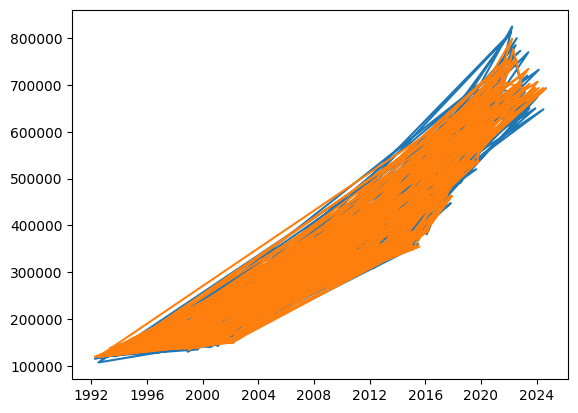

In [339]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [340]:
test_pred = gbf.predict(test[['lagged']])

In [341]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

912384063.3153013
21039.346841971783
12380.592495666817


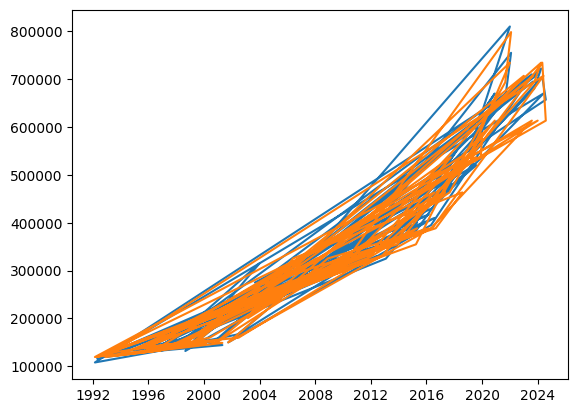

In [342]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

In [348]:
train = nelson[:-30].dropna()

In [358]:
test = nelson[-30:].dropna()

In [359]:
gbf.fit(train[['lagged']], train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_split=5,
                          n_estimators=200, random_state=42)

In [360]:
pred = gbf.predict(train[['lagged']])

In [361]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

351466478.51325655
13455.745302856547
9182.450303457415


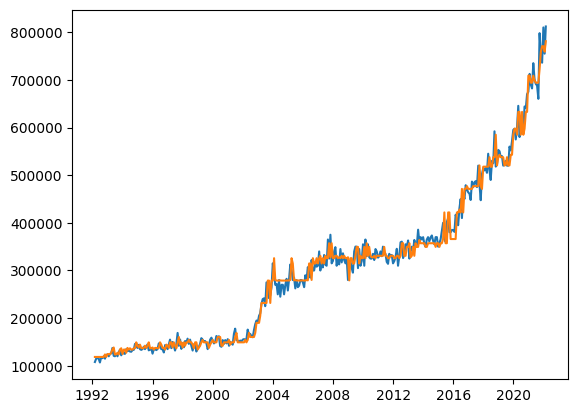

In [362]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [363]:
test_pred = gbf.predict(test[['lagged']])

In [366]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

2561106485.805117
39842.66939809838
26942.475503115624


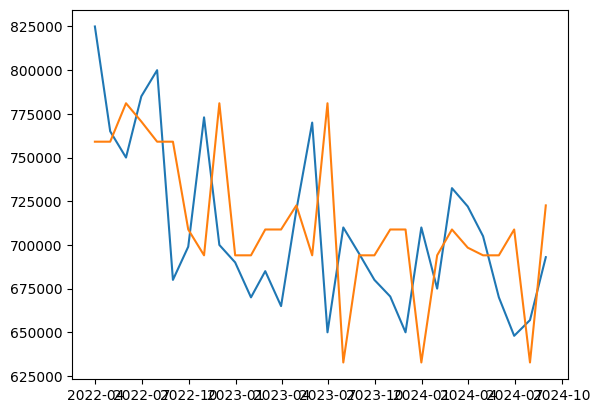

In [367]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

In [368]:
param_dist = {
    'n_estimators': randint(50, 200),  # Number of boosting stages
    'max_depth': randint(1, 10),       # Maximum depth of the tree
    'learning_rate': uniform(0.01, 0.4), # Learning rate for boosting
    'min_samples_split': randint(2, 20), # Minimum samples required to split
    'min_samples_leaf': randint(1, 10),  # Minimum samples in each leaf
    'subsample': uniform(0.5, 0.5),      # Fraction of samples used for fitting
}

In [369]:
gbr = GradientBoostingRegressor()

In [370]:
rs = RandomizedSearchCV(estimator=gbr, 
                                   param_distributions=param_dist, 
                                   n_iter=200,  # Number of parameter settings to sample
                                   cv=5,  # Number of cross-validation folds
                                   random_state=42,  # Ensures reproducibility
                                   n_jobs=-1)
search = rs.fit(train[['lagged']], train['Nelson'].values)

In [371]:
search.best_params_

{'learning_rate': 0.35566702602876127,
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 98,
 'subsample': 0.5218018858772169}

In [372]:
test_pred = search.best_estimator_.predict(test[['lagged']])

In [373]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

3355869978.009395
46676.11494002701
40938.478046315664


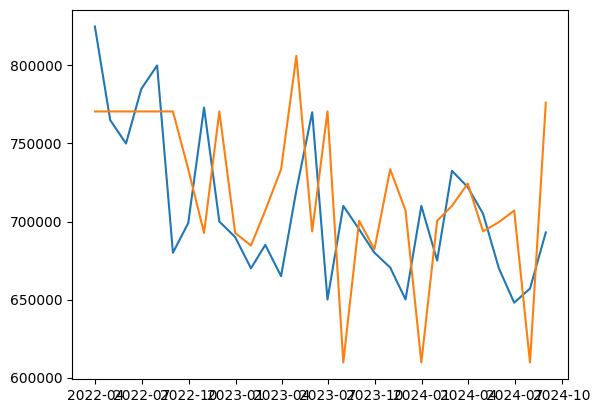

In [374]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

## Predict last value

In [375]:
param_dist = {
    'n_estimators': randint(50, 200),  # Number of boosting stages
    'max_depth': randint(1, 10),       # Maximum depth of the tree
    'learning_rate': uniform(0.01, 0.4), # Learning rate for boosting
    'min_samples_split': randint(2, 20), # Minimum samples required to split
    'min_samples_leaf': randint(1, 10),  # Minimum samples in each leaf
    'subsample': uniform(0.5, 0.5),      # Fraction of samples used for fitting
}

In [376]:
gbt = GradientBoostingRegressor()

In [377]:
rs = RandomizedSearchCV(estimator=gbt, 
                                   param_distributions=param_dist, 
                                   n_iter=200,  # Number of parameter settings to sample
                                   cv=5,  # Number of cross-validation folds
                                   random_state=42,  # Ensures reproducibility
                                   n_jobs=-1)
search = rs.fit(train[['lagged']], train['Nelson'].values)

In [378]:
search.best_params_

{'learning_rate': 0.09984192917599279,
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 137,
 'subsample': 0.6557365855663787}

In [379]:
test_pred = search.best_estimator_.predict(test[['lagged']])

In [380]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

2350591494.9812064
42454.72707411687
41618.09273830429


In [381]:
test_pred

array([750233.79617981, 750233.79617981, 750233.79617981, 750233.79617981,
       750233.79617981, 750233.79617981, 717004.42438177, 715238.75240935,
       750233.79617981, 715238.75240935, 688431.59901019, 704519.2166641 ,
       714909.97623957, 740476.5223293 , 750233.79617981, 750233.79617981,
       628956.88574964, 732946.50137183, 695971.71120124, 717004.42438177,
       704519.2166641 , 628956.88574964, 732946.50137183, 709464.81057743,
       750233.79617981, 750233.79617981, 725491.78429344, 704519.2166641 ,
       628956.88574964, 731002.3892968 ])

In [382]:
test.Nelson

date
2022-03-31    825000.0
2022-04-30    765000.0
2022-05-31    750000.0
2022-06-30    785000.0
2022-07-31    800000.0
2022-08-31    680000.0
2022-09-30    699000.0
2022-10-31    773000.0
2022-11-30    700000.0
2022-12-31    690000.0
2023-01-31    670000.0
2023-02-28    685000.0
2023-03-31    665000.0
2023-04-30    720000.0
2023-05-31    770000.0
2023-06-30    650000.0
2023-07-31    710000.0
2023-08-31    695000.0
2023-09-30    680000.0
2023-10-31    670500.0
2023-11-30    650000.0
2023-12-31    710000.0
2024-01-31    675000.0
2024-02-29    732500.0
2024-03-31    722000.0
2024-04-30    705000.0
2024-05-31    670000.0
2024-06-30    648000.0
2024-07-31    657000.0
2024-08-31    693000.0
Name: Nelson, dtype: float64

## Randomize training data

In [387]:
nelson.dropna(inplace=True)

In [388]:
train = nelson[:-30]
test = nelson[-30:]
train_randomized = train.sample(frac=1)

In [389]:
params = {
    "n_estimators":3000,
    "learning_rate":0.01,
    "max_depth":1
}

In [390]:
gbt = GradientBoostingRegressor(**params)

In [391]:
gbt.fit(train_randomized[['lagged']], train_randomized[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, max_depth=1, n_estimators=3000)

In [392]:
test_pred = gbt.predict(test[['lagged']])

In [393]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

2563004416.6127925
39781.838570813816
27186.916864207014


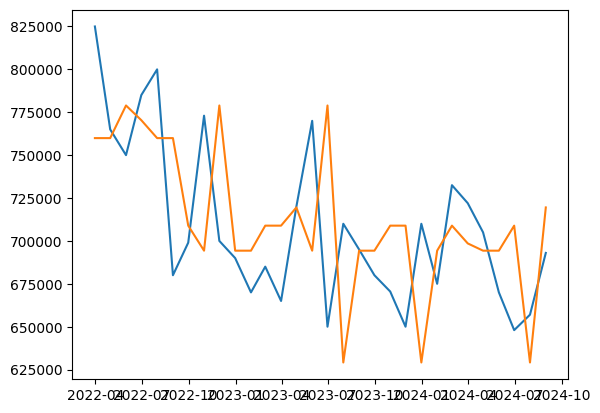

In [394]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

# Nelson_GDP

In [395]:
params = {
    "n_estimators": 500,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.2,
    "loss": "squared_error",
    "random_state": 42
}

In [396]:
gbf = GradientBoostingRegressor(**params)

In [397]:
train, test = train_test_split(nelson_gdp, test_size=0.2, shuffle=False)

In [398]:
gbf.fit(train.drop(columns=['Nelson']), train.Nelson)

GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_split=5,
                          n_estimators=500, random_state=42)

In [399]:
pred = gbf.predict(train.drop(columns=['Nelson']))

In [400]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

1362629.9894027761
887.0681541393764
699.1688433274394


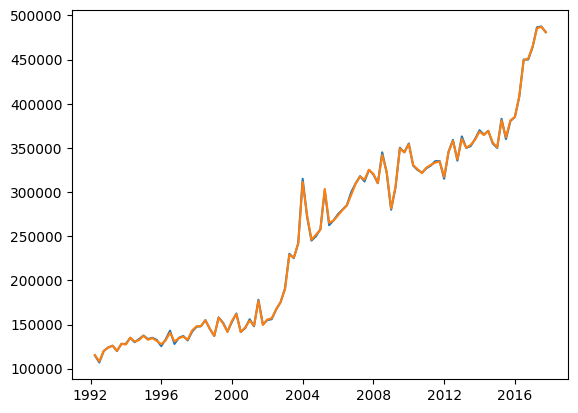

In [401]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [402]:
pred = gbf.predict(test.drop(columns=['Nelson']))

In [403]:
mse = mean_squared_error(pred, test.Nelson)
mae = mean_absolute_error(pred, test.Nelson)
mdae = median_absolute_error(pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

35983605481.50323
163260.03392656756
178356.29710518272


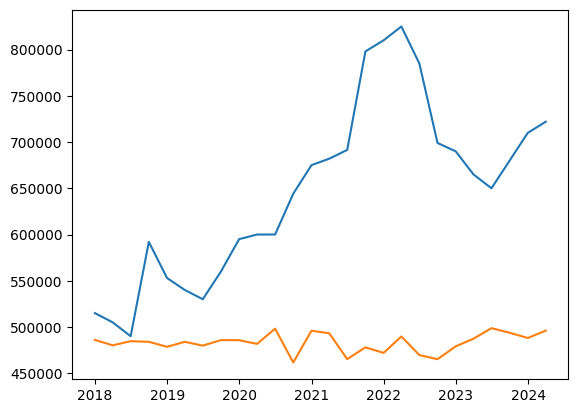

In [404]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, pred)

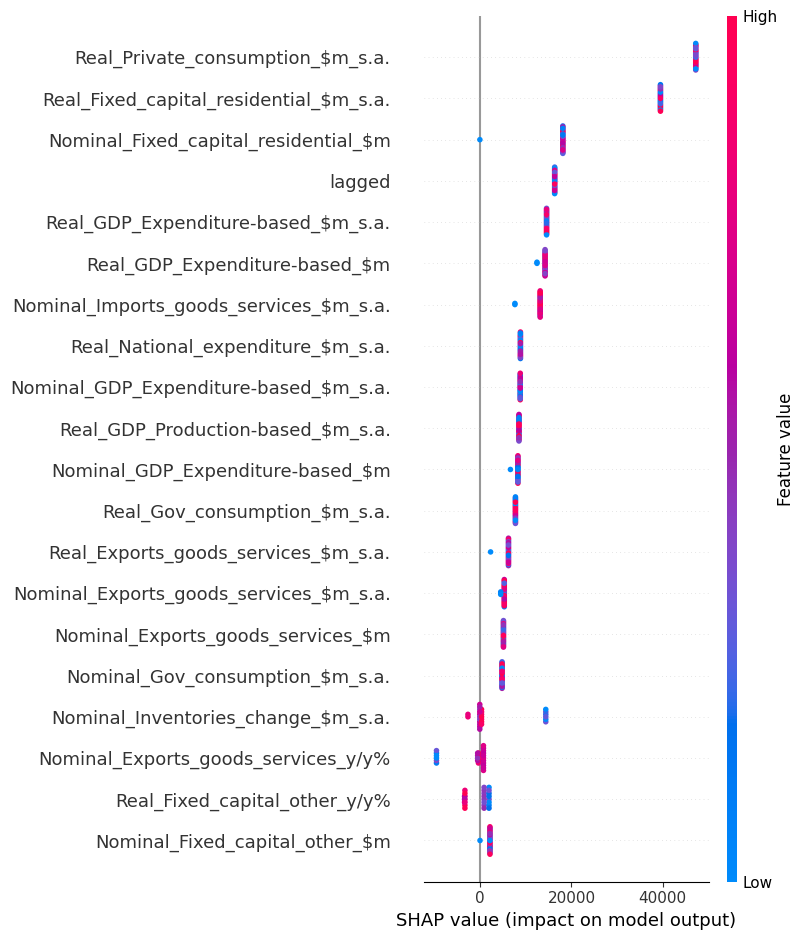

In [405]:
explainer = shap.Explainer(gbf, train.drop(columns=['Nelson']))
shap_values = explainer.shap_values(test.drop(columns=['Nelson']))
shap.summary_plot(shap_values, test.drop(columns=['Nelson']))

In [406]:
shap_headers = [
    "Real_GDP_Production-based_$m",
    "Nominal_GDP_Expenditure-based_$m_s.a.",
    "Real_GDP_Expenditure-based_$m",
    "Real_Private_consumption_$m_s.a.",
    "Nominal_Gov_consumption_$m",
    "Real_Gov_consumption_y/y%",
    "Nominal_Inventories_change_y/y%",
    "Real_Fixed_capital_residential_$m",
    "Real_Fixed_capital_residential_$m_s.a.",
    "Nominal_Fixed_capital_residential_$m",
    "Real_Fixed_capital_other_$m_s.a.",
    "Real_National_expenditure_$m_s.a.",
    "Real_Exports_goods_services_$m",
    "Real_Exports_goods_services_$m_s.a.",
    "Nominal_Exports_goods_services_$m_s.a.",
    "Real_Imports_goods_services_y/y%",
    "Nominal_Imports_goods_services_$m_s.a.",
    "lagged",
    "Nelson"
]

In [407]:
nelson_gdp[shap_headers].head(5)

,Real_GDP_Production-based_$m,Nominal_GDP_Expenditure-based_$m_s.a.,Real_GDP_Expenditure-based_$m,Real_Private_consumption_$m_s.a.,Nominal_Gov_consumption_$m,Real_Gov_consumption_y/y%,Nominal_Inventories_change_y/y%,Real_Fixed_capital_residential_$m,Real_Fixed_capital_residential_$m_s.a.,Nominal_Fixed_capital_residential_$m,Real_Fixed_capital_other_$m_s.a.,Real_National_expenditure_$m_s.a.,Real_Exports_goods_services_$m,Real_Exports_goods_services_$m_s.a.,Nominal_Exports_goods_services_$m_s.a.,Real_Imports_goods_services_y/y%,Nominal_Imports_goods_services_$m_s.a.,lagged,Nelson
date,,,,,,,,,,,,,,,,,,,
1992-03-31,28932.0,18994.0,28570.0,15526.0,3580.0,-0.5,-143.0,795.0,749.0,1684.0,2537.0,18147.0,5641.0,5726.0,7022.0,-0.7,5157.0,108000.0,115000.0
1992-06-30,27933.0,19305.0,27481.0,15624.0,3490.0,0.9,266.0,710.0,781.0,1498.0,2723.0,18989.0,5779.0,5583.0,6713.0,8.8,5559.0,115000.0,107000.0
1992-09-30,27522.0,19485.0,27552.0,15553.0,3930.0,0.3,104.0,811.0,782.0,1701.0,2637.0,18792.0,6353.0,6115.0,7216.0,16.4,5488.0,116000.0,120000.0
1992-12-31,27239.0,18973.0,25724.0,15492.0,3546.0,2.7,179.0,750.0,753.0,1576.0,2638.0,18422.0,5670.0,6031.0,7003.0,18.9,5570.0,122500.0,124000.0
1993-03-31,29195.0,19515.0,28788.0,15741.0,3736.0,1.5,212.0,843.0,799.0,1757.0,2726.0,19091.0,5975.0,6060.0,7030.0,15.6,5743.0,125000.0,126000.0


In [408]:
params = {
    "n_estimators": 20,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.4,
    "loss": "squared_error",
    "random_state": 42
}

In [409]:
gbf = GradientBoostingRegressor(**params)

In [410]:
train, test = train_test_split(nelson_gdp[shap_headers], test_size=0.2, shuffle=False)

In [411]:
gbf.fit(train.drop(columns=['Nelson']), train.Nelson)

GradientBoostingRegressor(learning_rate=0.4, max_depth=1, min_samples_split=5,
                          n_estimators=20, random_state=42)

In [412]:
pred = gbf.predict(train.drop(columns=['Nelson']))

In [413]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

136586228.15912113
8424.912302111325
6711.937787637464


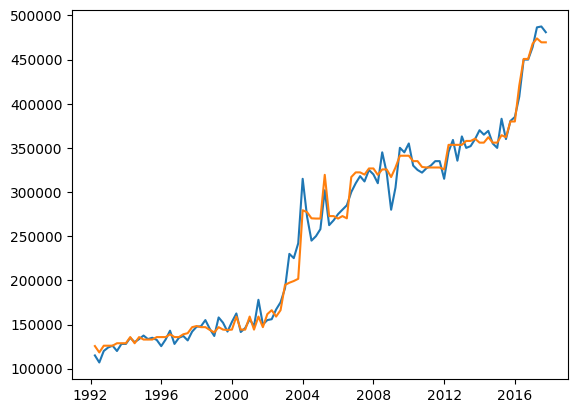

In [414]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [415]:
pred = gbf.predict(test.drop(columns=['Nelson']))

In [416]:
mse = mean_squared_error(pred, test.Nelson)
mae = mean_absolute_error(pred, test.Nelson)
mdae = median_absolute_error(pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

54082819803.70914
201732.29355368373
229627.9938226394


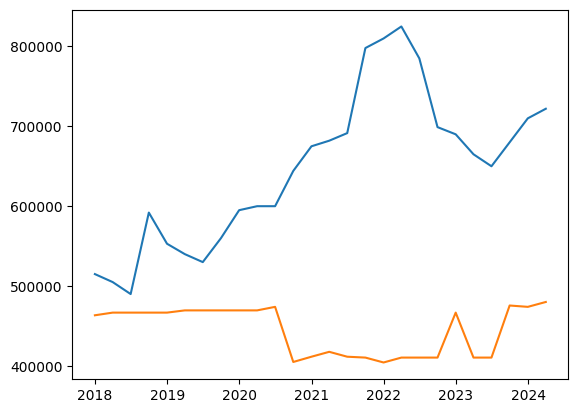

In [417]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, pred)

## Randomise Nelson_GDP dataset

In [418]:
train = nelson_gdp[:-20]
test = nelson_gdp[-20:]
train_randomized = train.sample(frac=1)

In [419]:
params = {
    "n_estimators":3000,
    "learning_rate":0.01,
    "max_depth":1
}

In [420]:
gbt = GradientBoostingRegressor(**params)

In [421]:
gbt.fit(train_randomized.drop(columns=['Nelson', 'lagged']), train_randomized[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, max_depth=1, n_estimators=3000)

In [422]:
test_pred = gbt.predict(test.drop(columns=['Nelson', 'lagged']))

In [423]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

20862748806.026234
123211.07330564247
127759.95492009661


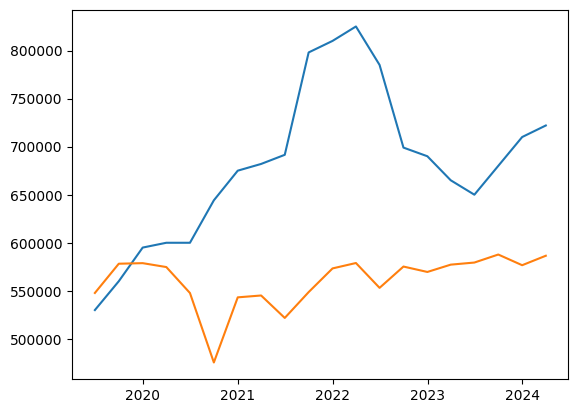

In [424]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

# Feature Engineering

In [425]:
def addFeatures(df):    
    for c in df.columns:
        if c == 'nelson':
            continue
        df[f'{c}_rolling_year'] = (df[c] - df[c].rolling(4).mean())
        df[f'{c}_rolling_half_year'] = (df[c] - df[c].rolling(2).mean())
        df[f'{c}_r_sum_3'] = df[c].rolling(3, 1).sum()
        df[f'{c}_r_sum_6'] = df[c].rolling(6, 1).sum() 
        df[f'{c}_r_sum_12'] = df[c].rolling(12, 1).sum()
        df[f'{c}_r_sum_8'] = df[c].rolling(8, 1).sum()
        df[f'{c}_r_sum_4'] = df[c].rolling(4, 1).sum()
        df[f'{c}_r_sum_8_yd'] = df[f'{c}_r_sum_8'] - df[f'{c}_r_sum_8'].shift(1)
        df[f'{c}_r_sum_4_yd'] = df[f'{c}_r_sum_4'] - df[f'{c}_r_sum_4'].shift(1)
        df[f'{c}_r_sum_12_diff'] = (df[c] - df[c].rolling(12, 1).sum())
        df[f'{c}_r_sum_8_diff'] = (df[c] - df[c].rolling(8, 1).sum())
        df[f'{c}_r_sum_4_diff'] = (df[c] - df[c].rolling(4, 1).sum())
        df[f'{c}_r_sum_12_sd'] = (df[c] - df[c].shift(12).rolling(12, 1).sum())
        df[f'{c}_r_sum_8_sd'] = (df[c] - df[c].shift(8).rolling(8, 1).sum()) 
        df[f'{c}_r_sum_4_sd'] = (df[c] - df[c].shift(4).rolling(4, 1).sum())
        df[f'{c}_annual_percent_change_quarter'] = (df[c] - df[c].shift(8) ) / [val if val > 0 else 1 for val in (df[c].shift(8) * 100)]
    return df

In [427]:
nelson_gdp_feat = addFeatures(nelson_gdp[shap_headers])

In [428]:
params = {
    "n_estimators": 500,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.3,
    "loss": "squared_error",
    "random_state": 42
}
gbf = GradientBoostingRegressor(**params)

In [429]:
train, test = train_test_split(nelson_gdp_feat.fillna(0), test_size=0.2, shuffle=False)
gbf.fit(train.drop(columns=['Nelson']), train.Nelson)
pred = gbf.predict(train.drop(columns=['Nelson']))

In [430]:
mse = mean_squared_error(pred, train.Nelson)
mae = mean_absolute_error(pred, train.Nelson)
mdae = median_absolute_error(pred, train.Nelson)
print(mse)
print(mae)
print(mdae)

7353.973188658324
64.003878591343
52.883427728142124


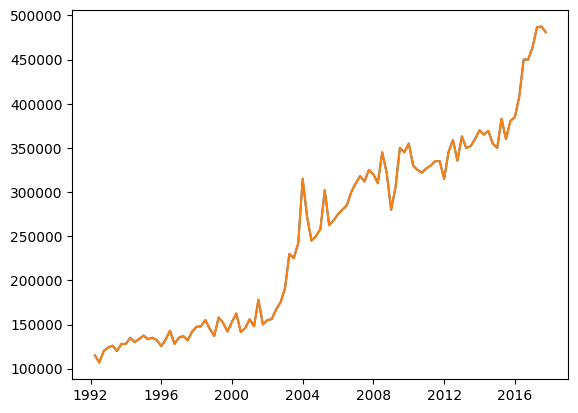

In [431]:
plt.plot(train.index, train.Nelson)
plt.plot(train.index, pred)

In [432]:
pred = gbf.predict(test.drop(columns=['Nelson']))

In [433]:
mse = mean_squared_error(pred, test.Nelson)
mae = mean_absolute_error(pred, test.Nelson)
mdae = median_absolute_error(pred, test.Nelson)
print(mse)
print(mae)
print(mdae)

38655321401.21695
171173.02017219164
192264.82424726416


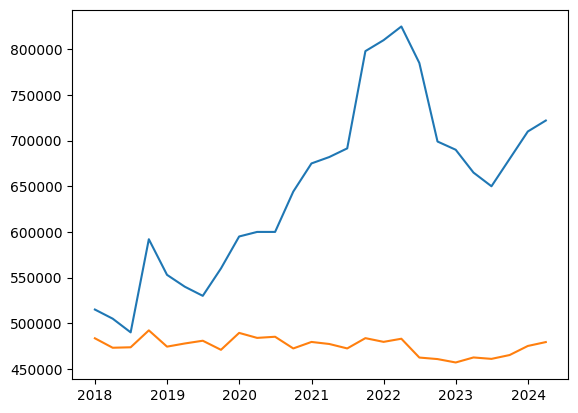

In [434]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, pred)

## Nelson_labour dataset 

In [435]:
df = xi.compute_xi_correlation(nelson_labour, nelson_labour.Nelson)
mask = np.where(df.Nelson.values > 0.8)
df.iloc[mask].index

Index(['Nelson', 'lagged', 'Labour force Employed (000s s.a.)',
       'Labour force Total (000s s.a.)', 'Working-age population (000s s.a.)',
       'Labour cost index (LCI) (Index)',
       'Average hourly earnings (ordinary time and overtime) ($)',
       'Private sector wages ($)', 'Public sector wages ($)'],
      dtype='object')

In [436]:
df_filtered = nelson_labour[df.iloc[mask].index]

In [437]:
df_filtered.head(5)

,Nelson,lagged,Labour force Employed (000s s.a.),Labour force Total (000s s.a.),Working-age population (000s s.a.),Labour cost index (LCI) (Index),Average hourly earnings (ordinary time and overtime) ($),Private sector wages ($),Public sector wages ($)
date,,,,,,,,,
1994-06-30,130000.0,132000.0,1582.0,1744.0,2728.0,709.0,14.94,14.29,16.94
1994-09-30,133500.0,133000.0,1599.0,1749.0,2737.0,710.0,15.06,14.45,16.97
1994-12-31,137500.0,141000.0,1620.0,1761.0,2748.0,714.0,15.05,14.47,16.87
1995-03-31,133500.0,135000.0,1643.0,1778.0,2758.0,715.0,15.12,14.48,17.17
1995-06-30,135000.0,140000.0,1662.0,1783.0,2770.0,718.0,15.23,14.59,17.38


In [438]:
train = df_filtered[:-20]
test = df_filtered[-20:]

In [439]:
params = {
    "n_estimators": 500,
    "max_depth": 1,
    "learning_rate": 0.2,
    "random_state": 42
}
gbf = GradientBoostingRegressor(**params)

In [440]:
gbf.fit(train.drop(columns=['Nelson', 'lagged']), train.Nelson)

GradientBoostingRegressor(learning_rate=0.2, max_depth=1, n_estimators=500,
                          random_state=42)

In [441]:
test_pred = gbf.predict(test.drop(columns=['Nelson', 'lagged']))

In [442]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 28705706460.57374
MAE: 153449.72834738492
MDAE: 147966.47834738495


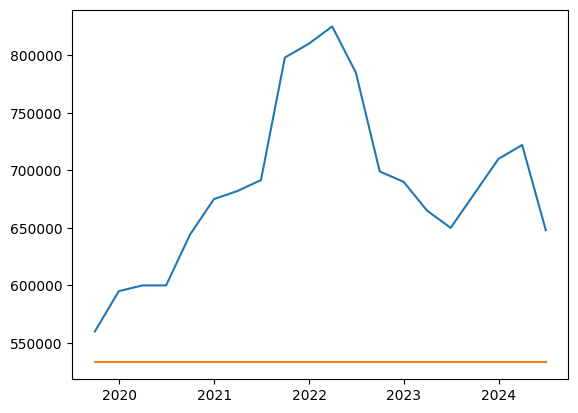

In [443]:
plt.plot(test.index, test.Nelson)
plt.plot(test.index, test_pred)

### With train test split

In [444]:
train, test = train_test_split(df_filtered[:-1], test_size=0.2, random_state=42)

In [445]:
params = {
    "n_estimators": 5000,
    "max_depth": 3,
    "learning_rate": 0.01,
    "random_state": 42
}

In [446]:
gbt = GradientBoostingRegressor(**params)

In [447]:
gbt.fit(train.drop(columns=['Nelson']), train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000,
                          random_state=42)

In [448]:
test_pred = gbt.predict(test.drop(columns=['Nelson']))

In [449]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 801173107.4988031
MAE: 17150.30229755273
MDAE: 7216.359982680879


In [450]:
pred_last = gbt.predict(df_filtered[-1:].drop(columns=['Nelson']))

In [451]:
df_filtered[-1:]

,Nelson,lagged,Labour force Employed (000s s.a.),Labour force Total (000s s.a.),Working-age population (000s s.a.),Labour cost index (LCI) (Index),Average hourly earnings (ordinary time and overtime) ($),Private sector wages ($),Public sector wages ($)
date,,,,,,,,,
2024-06-30,648000.0,670000.0,2942.0,3076.0,4298.0,1382.0,41.03,39.02,48.61


In [452]:
pred_last[0]

703309.359461267

### With Huber loss

In [454]:
params = {
    "n_estimators": 5000,
    "max_depth": 3,
    "learning_rate": 0.01,
    "random_state": 42,
    "loss": "huber",
    "alpha":0.6
}
gbt_huber = GradientBoostingRegressor(**params)

In [455]:
gbt_huber.fit(train.drop(columns=['Nelson']), train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(alpha=0.6, learning_rate=0.01, loss='huber',
                          n_estimators=5000, random_state=42)

In [456]:
test_pred = gbt_huber.predict(test.drop(columns=['Nelson']))

In [457]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 912990159.2170671
MAE: 18193.82575804064
MDAE: 9065.227350063244


In [458]:
pred_last = gbt.predict(df_filtered[-1:].drop(columns=['Nelson']))

In [459]:
pred_last[0]

703309.359461267

In [460]:
df_filtered[-1:].Nelson

date
2024-06-30    648000.0
Name: Nelson, dtype: float64

In [461]:
gbt = GradientBoostingRegressor()

In [462]:
param_dist = {
    'n_estimators': [5000],
    'learning_rate': [0.1],
    'max_depth': [1],
    'loss':['huber'],
    'alpha':np.arange(0.01, 1),
    'random_state':[42]
}

random_search = RandomizedSearchCV(
    estimator=gbt,            
    param_distributions=param_dist,
    n_iter=100,              
    scoring='roc_auc', 
    cv=5,                      
    random_state=42,            
    n_jobs=-1                   
)

random_search.fit(train.drop(columns=['Nelson']), train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': array([0.01]),
                                        'learning_rate': [0.1],
                                        'loss': ['huber'], 'max_depth': [1],
                                        'n_estimators': [5000],
                                        'random_state': [42]},
                   random_state=42, scoring='roc_auc')

In [463]:
random_search.best_params_

{'random_state': 42,
 'n_estimators': 5000,
 'max_depth': 1,
 'loss': 'huber',
 'learning_rate': 0.1,
 'alpha': 0.01}

In [464]:
test_pred = random_search.best_estimator_.predict(test.drop(columns=['Nelson']))

In [465]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 31279511354.166656
MAE: 135764.58333333328
MDAE: 120000.00000000006


In [466]:
pred_last = random_search.best_estimator_.predict(df_filtered[-1:].drop(columns=['Nelson']))
pred_last[0]

330000.0

In [467]:
test_pred = random_search.best_estimator_.predict(test.sort_values(by='date').drop(columns=['Nelson']))

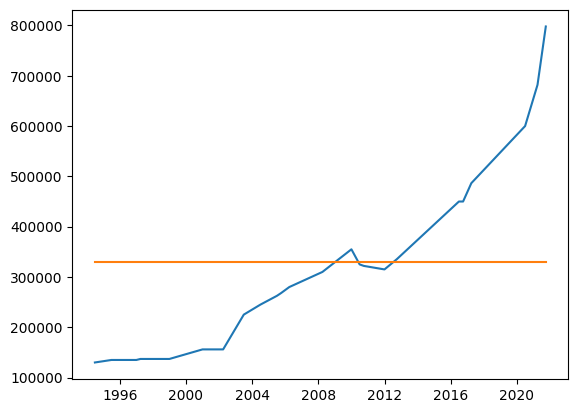

In [468]:
test_pred = random_search.best_estimator_.predict(test.sort_values(by='date').drop(columns=['Nelson']))
plt.plot(test.sort_values(by='date').index, test.sort_values(by='date').Nelson)
plt.plot(test.sort_values(by='date').index, test_pred)

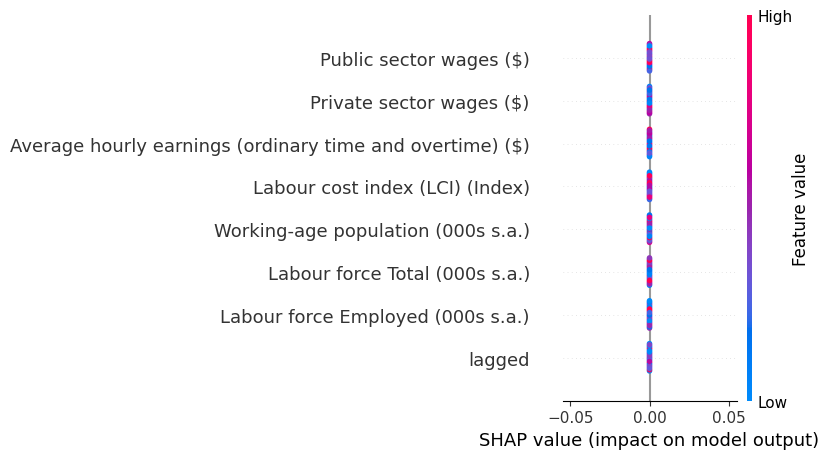

In [469]:
explainer = shap.Explainer(random_search.best_estimator_, train.drop(columns=['Nelson']))
shap_values = explainer.shap_values(test.drop(columns=['Nelson']))
shap.summary_plot(shap_values, test.drop(columns=['Nelson']))

### Check Squared error

In [473]:
gbt = GradientBoostingRegressor()

param_dist = {
    'n_estimators': [5000],
    'learning_rate': [0.1],
    'max_depth': [1],
    'loss':['squared_error'],
}

random_search = RandomizedSearchCV(
    estimator=gbt,            
    param_distributions=param_dist,
    n_iter=100,              
    scoring='roc_auc', 
    cv=5,                      
    random_state=42,            
    n_jobs=-1                   
)

random_search.fit(train.drop(columns=['Nelson']), train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1],
                                        'loss': ['squared_error'],
                                        'max_depth': [1],
                                        'n_estimators': [5000]},
                   random_state=42, scoring='roc_auc')

In [474]:
random_search.best_params_

{'n_estimators': 5000,
 'max_depth': 1,
 'loss': 'squared_error',
 'learning_rate': 0.1}

In [475]:
test_pred = random_search.best_estimator_.predict(test.drop(columns=['Nelson']))

In [476]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 895276173.2462624
MAE: 18531.11962207392
MDAE: 10159.80202231431


In [477]:
pred_last = random_search.best_estimator_.predict(df_filtered[-1:].drop(columns=['Nelson']))
print(f'Actual value: {df_filtered[-1:].Nelson.values[0]}, Predicted value: {pred_last[0]}')

Actual value: 648000.0, Predicted value: 692611.4574705625


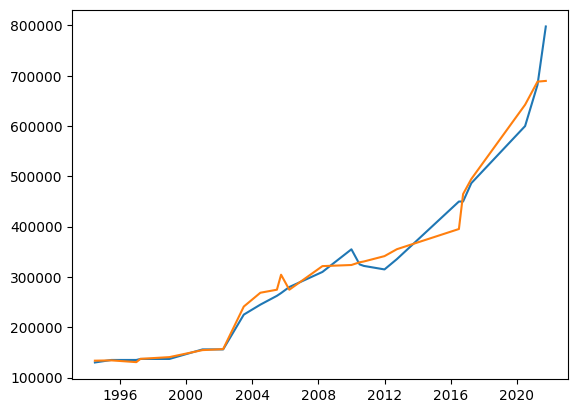

In [478]:
test_pred = random_search.best_estimator_.predict(test.sort_values(by='date').drop(columns=['Nelson']))
plt.plot(test.sort_values(by='date').index, test.sort_values(by='date').Nelson)
plt.plot(test.sort_values(by='date').index, test_pred)

#### Change hyperparameters

In [479]:
param_dist = {
    'n_estimators': np.arange(1, 5000),
    'learning_rate': np.arange(0.01, 0.5),
    'max_depth': np.arange(1, 4),
    'loss':['huber'],
    'alpha':np.arange(0.01, 1)
}

random_search = RandomizedSearchCV(
    estimator=gbt,            
    param_distributions=param_dist,
    n_iter=100,              
    scoring='roc_auc', 
    cv=5,                      
    random_state=42,            
    n_jobs=-1,
    verbose=2                   
)

random_search.fit(train.drop(columns=['Nelson']), train[['Nelson']])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': array([0.01]),
                                        'learning_rate': array([0.01]),
                                        'loss': ['huber'],
                                        'max_depth': array([1, 2, 3]),
                                        'n_estimators': array([   1,    2,    3, ..., 4997, 4998, 4999])},
                   random_state=42, scoring='roc_auc', verbose=2)

In [480]:
random_search.best_params_

{'n_estimators': 2272,
 'max_depth': 2,
 'loss': 'huber',
 'learning_rate': 0.01,
 'alpha': 0.01}

In [481]:
test_pred = random_search.best_estimator_.predict(test.drop(columns=['Nelson']))

In [482]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 31279511354.166656
MAE: 135764.58333333328
MDAE: 120000.00000000006


In [483]:
pred_last = random_search.best_estimator_.predict(df_filtered[-1:].drop(columns=['Nelson']))
pred_last[0]

330000.0

### Mean Absolute loss

In [484]:
param_dist = {
    'n_estimators': np.arange(1, 5000),
    'learning_rate': np.arange(0.01, 0.5),
    'max_depth': np.arange(1, 4),
    'loss':['absolute_error'],
}

random_search = RandomizedSearchCV(
    estimator=gbt,            
    param_distributions=param_dist,
    n_iter=100,              
    scoring='roc_auc', 
    cv=5,                      
    random_state=42,            
    n_jobs=-1,
    verbose=2                   
)

random_search.fit(train.drop(columns=['Nelson']), train[['Nelson']])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01]),
                                        'loss': ['absolute_error'],
                                        'max_depth': array([1, 2, 3]),
                                        'n_estimators': array([   1,    2,    3, ..., 4997, 4998, 4999])},
                   random_state=42, scoring='roc_auc', verbose=2)

In [485]:
random_search.best_params_

{'n_estimators': 2272,
 'max_depth': 2,
 'loss': 'absolute_error',
 'learning_rate': 0.01}

In [486]:
test_pred = random_search.best_estimator_.predict(test.drop(columns=['Nelson']))

In [487]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 906135244.0361136
MAE: 16882.82985565251
MDAE: 7399.923796637289


In [488]:
pred_last = random_search.best_estimator_.predict(df_filtered[-1:].drop(columns=['Nelson']))
pred_last[0]

698454.5336769433

### With Quantile loss

In [489]:
param_dist = {
    'n_estimators': [5000],
    'learning_rate': [0.1],
    'max_depth': [3],
    'loss':['quantile'],
    'alpha':np.arange(0.01, 1)
}

random_search = RandomizedSearchCV(
    estimator=gbt,            
    param_distributions=param_dist,
    n_iter=100,              
    scoring='roc_auc', 
    cv=5,                      
    random_state=42,            
    n_jobs=-1                   
)

random_search.fit(train.drop(columns=['Nelson']), train[['Nelson']])

C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\spong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': array([0.01]),
                                        'learning_rate': [0.1],
                                        'loss': ['quantile'], 'max_depth': [3],
                                        'n_estimators': [5000]},
                   random_state=42, scoring='roc_auc')

In [490]:
random_search.best_params_

{'n_estimators': 5000,
 'max_depth': 3,
 'loss': 'quantile',
 'learning_rate': 0.1,
 'alpha': 0.01}

In [491]:
test_pred = random_search.best_estimator_.predict(test.drop(columns=['Nelson']))

In [492]:
mse = mean_squared_error(test_pred, test.Nelson)
mae = mean_absolute_error(test_pred, test.Nelson)
mdae = median_absolute_error(test_pred, test.Nelson)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MDAE: {mdae}')

MSE: 68305265520.833336
MAE: 192485.41666666666
MDAE: 166999.99999999994


In [493]:
pred_last = random_search.best_estimator_.predict(df_filtered[-1:].drop(columns=['Nelson']))
pred_last[0]

128000.00000000006